# Clustering of Wines

### Submitted by Ashmina T.

**Objective:** To do the following in the wine dataset.
1. Read the dataset to the python environment.
2. Try out different clustering models in the wine dataset.
3. Find the optimum number of clusters in each model and create the model with the optimum number of clusters.


In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram,linkage

### 1. Reading the dataset to the python environment.

In [2]:
#loading the dataset
wine_data = pd.read_csv('Wine.csv')

In [3]:
#displaying the first 5 rows
wine_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine_data.shape

(178, 13)

This dataset consists of 178 rows and 13 columns.

In [5]:
#concise summary of the dataset
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


All features are numerical.

In [6]:
#checking for missing values
wine_data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

There are no missing values in the dataset.

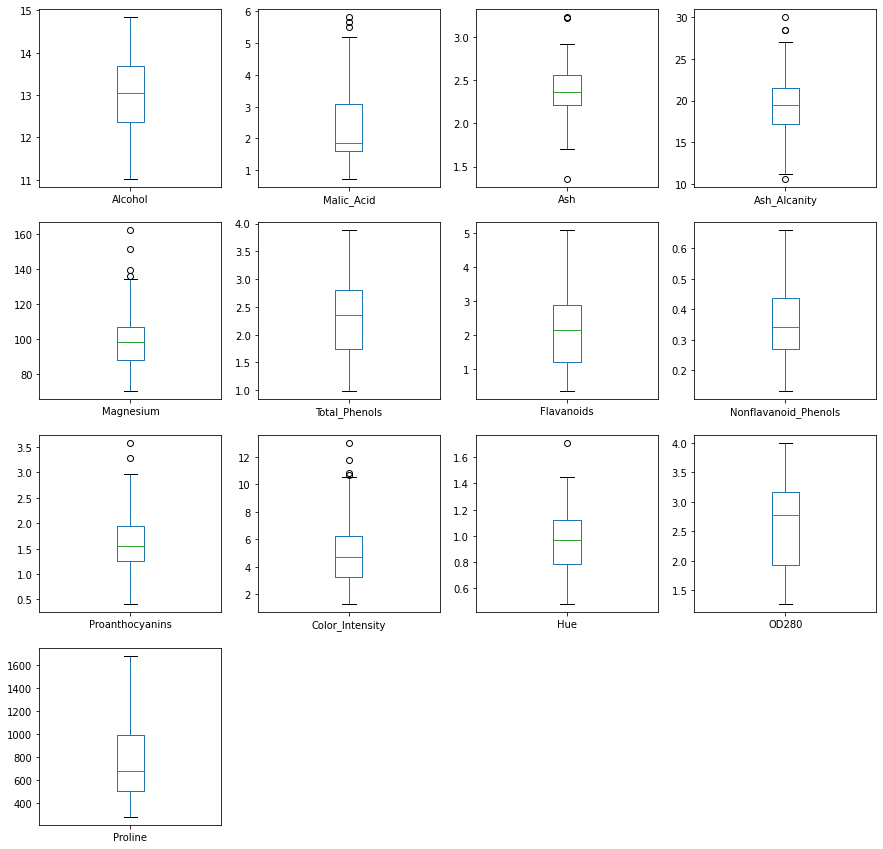

In [7]:
#checking for outliers
wine_data.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,15))
plt.show()

The features 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Proanthocyanins', 'Color_Intensity', and 'Hue' are having outliers.  
As the dataset is small, droping the records containing outliers is not feasible. So, we have to impute the outiers with appropriate values. Due to lack of domain knowledge, I prefer quantile based flooring or capping. The data points that are lesser than lower limit(q1-1.5\*IQR) are replaced with the lower limit value and the data points that are greater than upper limit(q3+1.5\*IQR) are replaced with the upper limit value.

In [8]:
#handling outliers
col_list = ['Malic_Acid','Ash','Ash_Alcanity','Magnesium','Proanthocyanins','Color_Intensity','Hue']

for feature in col_list:
    #finding quartiles
    q1 = np.percentile(wine_data[feature],25)
    q3 = np.percentile(wine_data[feature],75)

    #calculating inter quartile range
    IQR = q3-q1

    #calculating lower and upper limits
    lower = q1-1.5*IQR
    upper = q3+1.5*IQR
    
    #capping/flooring the outlier at the upper and lower limits
    wine_data[feature] = np.where(wine_data[feature]>upper,upper,
                                     np.where(wine_data[feature]<lower,lower,wine_data[feature]))

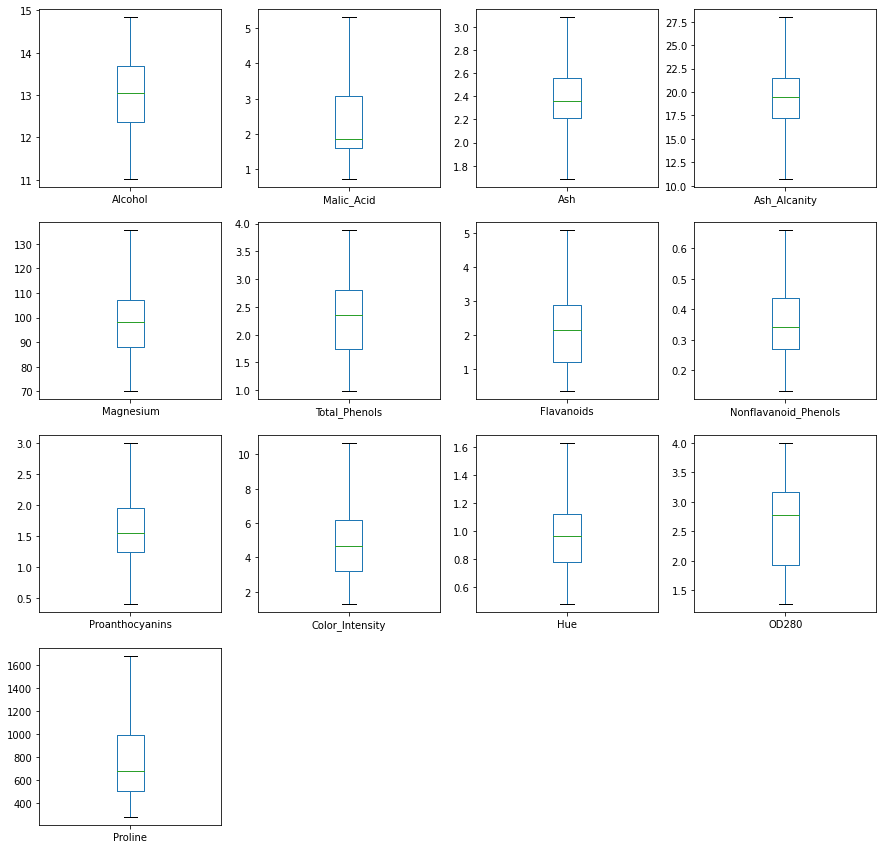

In [9]:
wine_data.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,15))
plt.show()

There are no more outliers in the dataset.

In [10]:
#statistical summary of the dataset
wine_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.330435,2.366721,19.478090,99.483146,2.295112,2.029270,0.361854,1.586067,5.038146,0.956979,2.611685,746.893258
std,0.811827,1.100173,0.263705,3.287757,13.414186,0.625851,0.998859,0.124453,0.558153,2.260881,0.227095,0.709990,314.907474
min,11.030000,0.740000,1.688750,10.750000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.302500,3.078750,27.950000,135.500000,3.880000,5.080000,0.660000,3.000000,10.670000,1.626250,4.000000,1680.000000


Since all the features are in different scales, we should do feature scaling. 

In [11]:

#standardisation
column = wine_data.columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(wine_data)
#converting it into a dataframe
scaled_data = pd.DataFrame(scaled_data,columns = column)

In [12]:
scaled_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,1.883637e-16,-4.465841e-16,-2.681999e-16,-1.702758e-16,-2.972030e-16,-4.016762e-16,4.079134e-16,1.503167e-16,-1.197544e-16,7.484650e-18,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.449701e+00,-2.578195e+00,-2.662213e+00,-2.204108e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.113014e+00,-1.666938e+00,-2.106273e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.635217e-01,-5.959788e-01,-6.948555e-01,-8.584597e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-6.038048e-01,-8.064445e-01,-7.704749e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.242499e-01,-2.555683e-02,6.682950e-03,-1.108774e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-5.581813e-02,-1.544213e-01,3.541993e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.855158e-01,7.254987e-01,6.167164e-01,5.619467e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.538695e-01,5.153441e-01,7.198786e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,2.709072e+00,2.707715e+00,2.584074e+00,2.692556e+00,2.539515e+00,3.062832e+00,2.402403e+00,2.540381e+00,2.498027e+00,2.955409e+00,1.960915e+00,2.971473e+00


#### EDA

<AxesSubplot:>

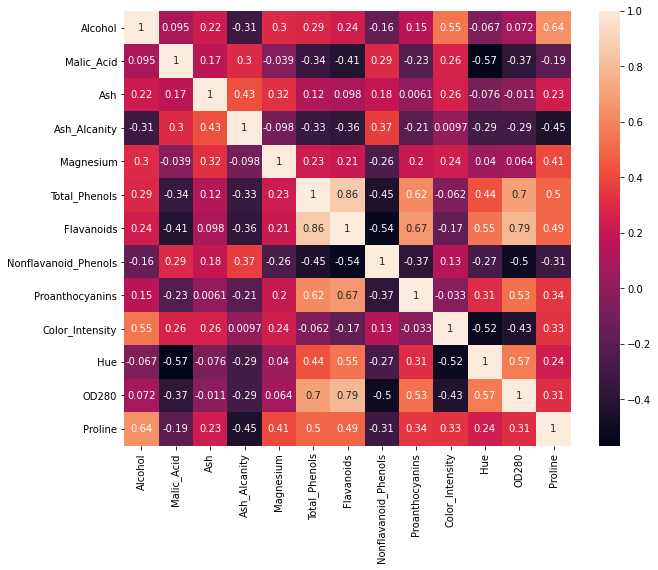

In [13]:
#heatmap
plt.figure(figsize=(10,8))
sns.heatmap(scaled_data.corr(),annot=True)

### 2. Trying out different clustering models.

#### K-Means Clustering

In [14]:
#implementing k-means clustering with number of clusters as 2
kmeans = KMeans(n_clusters=2,init='k-means++',random_state=42)
label_kmeans = kmeans.fit_predict(scaled_data)
label_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

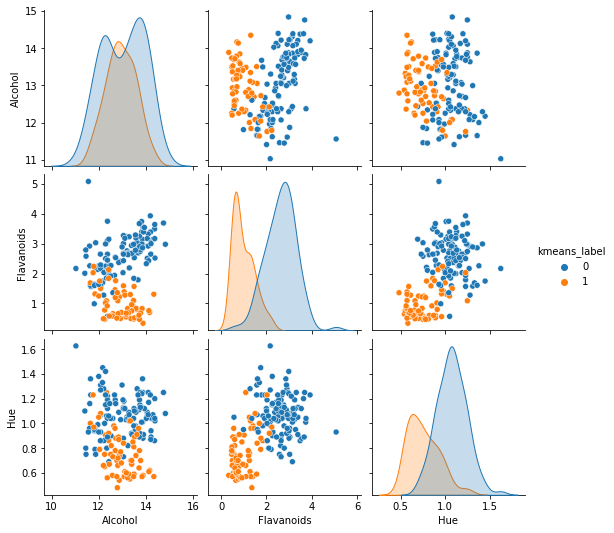

In [15]:
#selecting important features from the original dataframe for visualizing the clusters
wine_data_slice = wine_data[['Alcohol','Flavanoids','Hue']].copy()
wine_data_slice['kmeans_label']=label_kmeans
#pairplots
sns.pairplot(wine_data_slice,hue='kmeans_label')

#### Agglomerative Hierarchical clustering

In [16]:
#implementing Agglomerative HC with 2 clusters
hc = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
label_hc = hc.fit_predict(scaled_data)
label_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

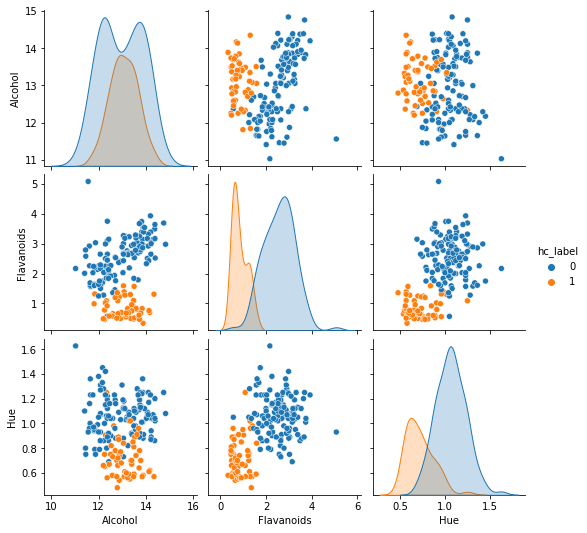

In [17]:
#selecting important features from the original dataframe for visualizing the clusters
wine_data_slice = wine_data[['Alcohol','Flavanoids','Hue']].copy()
wine_data_slice['hc_label']=label_hc
#pairplots
sns.pairplot(wine_data_slice,hue='hc_label')

### 3. Find the optimum number of clusters in each model and create the model with the optimum number of clusters

#### K-Means Clustering

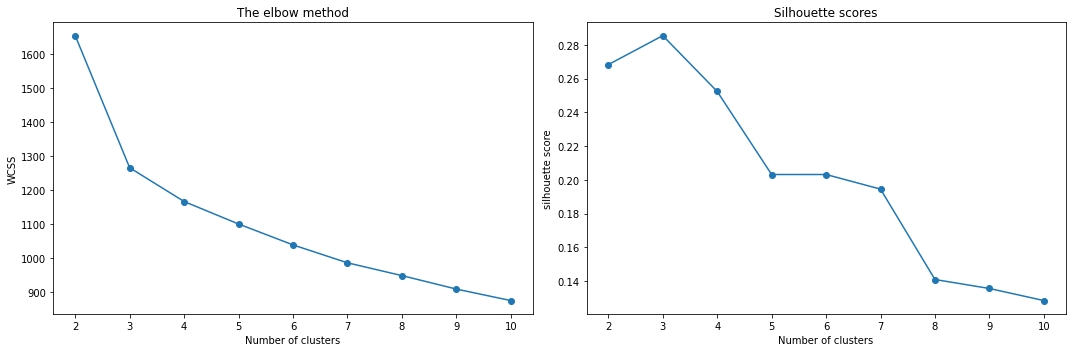

In [18]:
#elbow method to get optimal number of clusters
wcss = []
scores = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    model=kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    labels = model.predict(scaled_data)
    sil_score = silhouette_score(scaled_data,labels)
    scores.append(sil_score)

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(range(2,11),wcss,'-o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.subplot(1,2,2)
plt.plot(range(2,11),scores,'-o')
plt.title('Silhouette scores')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')
plt.tight_layout()
plt.show()

Optimum number of clusters is 3.

In [19]:
#implementing k-means clustering with number of clusters as 3
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=42)
label_kmeans = kmeans.fit_predict(scaled_data)
label_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

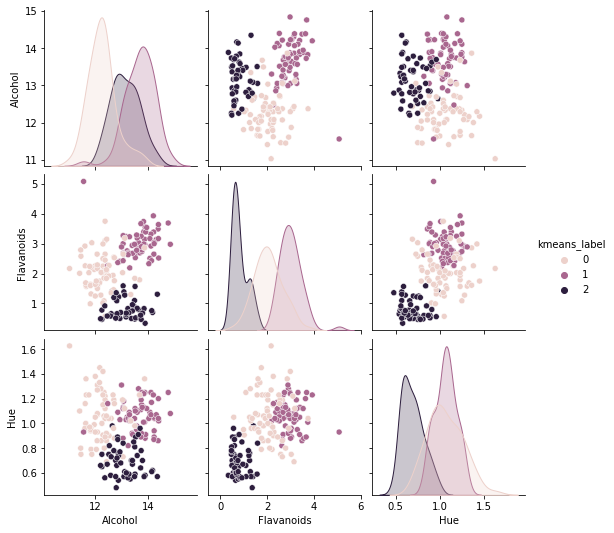

In [20]:
#selecting important features from the original dataframe for visualizing the clusters
wine_data_slice = wine_data[['Alcohol','Flavanoids','Hue']].copy()
wine_data_slice['kmeans_label']=label_kmeans
#pairplots
sns.pairplot(wine_data_slice,hue='kmeans_label')

In [21]:
#model evaluation
print("Silhouette score :",silhouette_score(scaled_data,label_kmeans))

Silhouette score : 0.2854626783251893


#### Agglomerative Hierarchical clustering

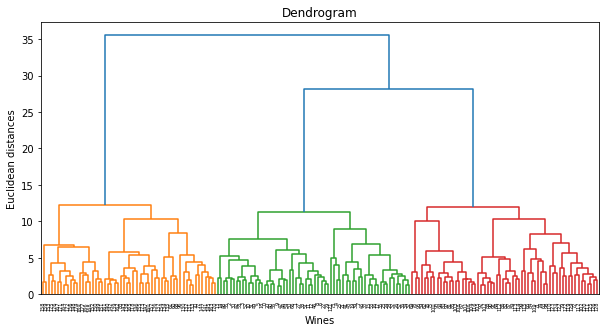

In [22]:
#finding optimum number of clusters
plt.figure(figsize=(10,5))
dendrogram(linkage(scaled_data,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Wines')
plt.ylabel('Euclidean distances')
plt.show()

Optimum number of clusters is 3.

In [23]:
#implementing Agglomerative HC with 3 clusters
hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
label_hc = hc.fit_predict(scaled_data)
label_hc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

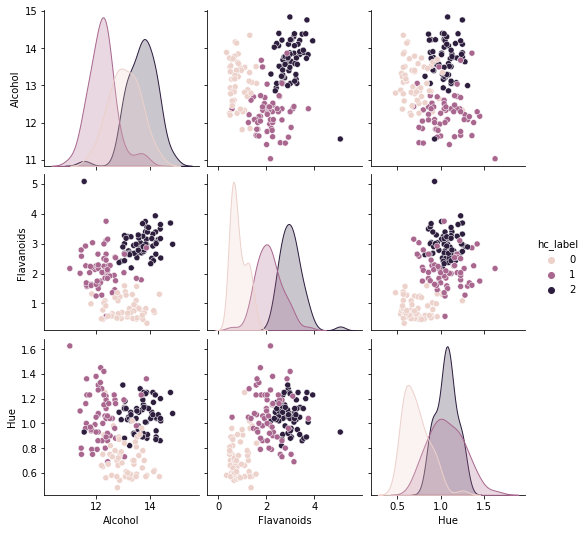

In [24]:
#selecting important features from the original dataframe for visualizing the clusters
wine_data_slice = wine_data[['Alcohol','Flavanoids','Hue']].copy()
wine_data_slice['hc_label']=label_hc
#pairplots
sns.pairplot(wine_data_slice,hue='hc_label')
plt.show()

In [25]:
#model evaluation
print("Silhouette score :",silhouette_score(scaled_data,label_hc))

Silhouette score : 0.2786997668206731


The two models behaved similarly